In [105]:
import csv
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import HTML
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score ,mean_squared_error, accuracy_score, precision_score, recall_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [44]:
unscaled_target_encoding_data_path = "Dataset/Processed Data/unscaled_target_encoding_data.csv"
scaled_target_encoding_data_path = "Dataset/Processed Data/scaled_target_encoding_data.csv"

In [45]:
unscaled_one_hot_encoding_data_path = "Dataset/Processed Data/unscaled_one_hot_encoding_data.csv"
scaled_one_hot_encoding_data_path = "Dataset/Processed Data/scaled_one_hot_encoding_data.csv"

In [46]:
fieldnames = ['age',
              'job',
              'marital',
              'education',
              'default',
              'balance',
              'housing',
              'loan',
              'contact',
              'day',
              'month',
              'duration',
              'campaign',
              'pdays',
              'previous',
              'poutcome',
              'y']

In [47]:
def delete_csv(data_path='Dataset/Processed Data/bank-full.csv'):
    if os.path.exists(data_path):
      os.remove(data_path)

<h1> Feature Scaling : Target Encoded Data </h1>

In [48]:
unscaled_df = pd.read_csv(unscaled_target_encoding_data_path)

In [49]:
def scaling(dataframe,csv_path,indices_to_scale):
    cols = dataframe.columns
    cols_to_scale = [col for i, col in enumerate(cols) if i in indices_to_scale]

    # Instantiate the MinMaxScaler object
#     scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = MinMaxScaler()

    scaler.fit(dataframe[cols_to_scale])

    scaled_cols = scaler.transform(dataframe[cols_to_scale])

    # Replace the original columns with the scaled columns in the DataFrame
    dataframe.loc[:, cols_to_scale] = scaled_cols

    dataframe.to_csv(csv_path, index=False)

In [50]:
indices_to_scale = [0,1,2,3,5,8,9,10,11,12,13,14,15]
delete_csv(scaled_target_encoding_data_path)
scaling(unscaled_df, scaled_target_encoding_data_path, indices_to_scale)

In [51]:
df = pd.read_csv(scaled_target_encoding_data_path)

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,0.297873,0.137906,0.0,0.194805,0.272727,0.389610,1.0
job,45211.0,0.206676,0.204214,0.0,0.070801,0.176705,0.302787,1.0
marital,45211.0,0.326380,0.439083,0.0,0.000000,0.000000,1.000000,1.0
education,45211.0,0.481512,0.366224,0.0,0.302975,0.302975,1.000000,1.0
default,45211.0,0.018027,0.133049,0.0,0.000000,0.000000,0.000000,1.0
balance,45211.0,0.085171,0.027643,0.0,0.073457,0.076871,0.085768,1.0
housing,45211.0,0.555838,0.496878,0.0,0.000000,1.000000,1.000000,1.0
loan,45211.0,0.160226,0.366820,0.0,0.000000,0.000000,0.000000,1.0
contact,45211.0,0.703139,0.448428,0.0,0.000000,1.000000,1.000000,1.0
day,45211.0,0.493547,0.277416,0.0,0.233333,0.500000,0.666667,1.0


In [53]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  int64  
dtypes: float64(13), int64(4)
memory usage: 5.9 MB


In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.302787,0.0,1.000000,0,0.092259,1,0,0.0,0.133333,0.0,0.053070,0.0,0.0,0.0,0.0,0
1,0.337662,0.176705,1.0,0.302975,0,0.073067,1,0,0.0,0.133333,0.0,0.030704,0.0,0.0,0.0,0.0,0
2,0.194805,0.046569,0.0,0.302975,0,0.072822,1,1,0.0,0.133333,0.0,0.015453,0.0,0.0,0.0,0.0,0
3,0.376623,0.000000,0.0,0.774900,0,0.086476,1,0,0.0,0.133333,0.0,0.018707,0.0,0.0,0.0,0.0,0
4,0.194805,0.211679,1.0,0.774900,0,0.072812,0,0,0.0,0.133333,0.0,0.040260,0.0,0.0,0.0,0.0,0


<h2> Pearson Correlation Testing </h2>

<AxesSubplot: >

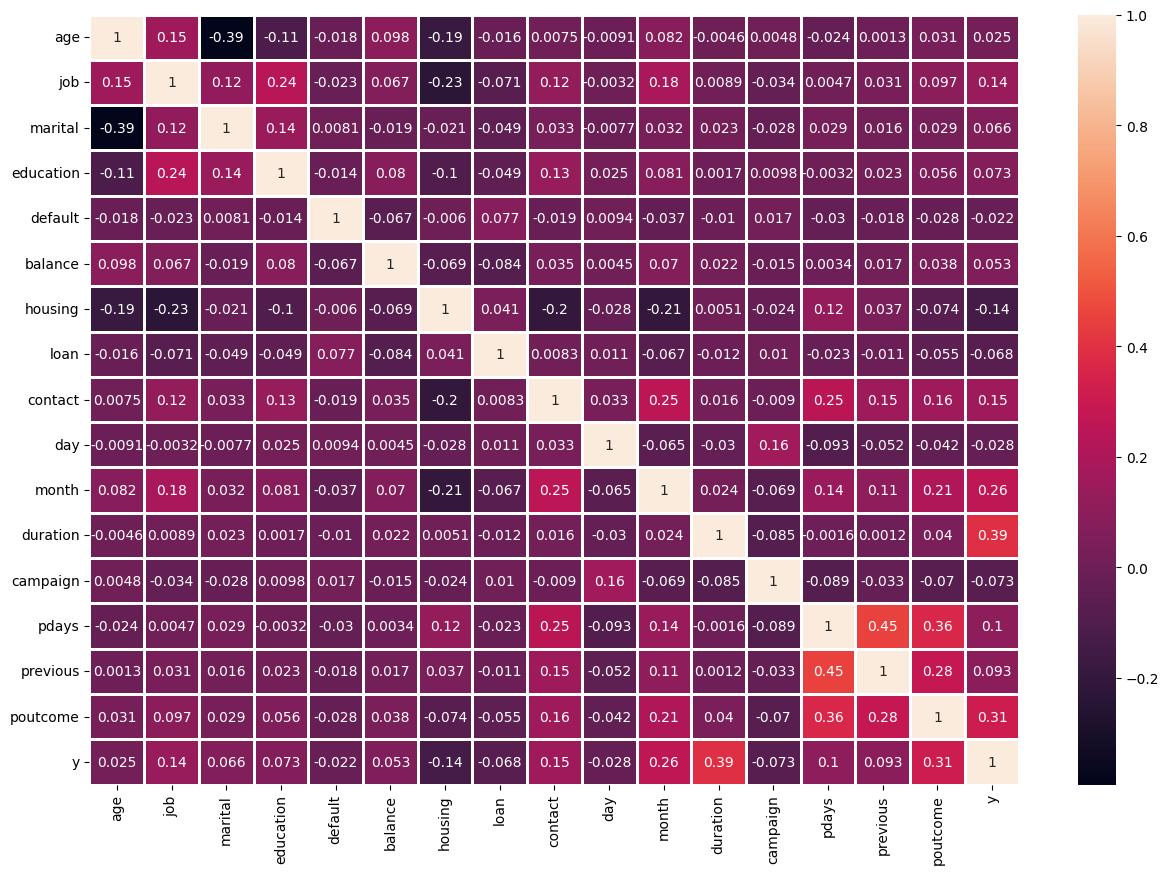

In [84]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(df.corr(method='pearson'), annot=True,linewidths=.9, ax=ax)

<h2> Chi-Square Testing </h2>

In [57]:
def chi_testing(dataframe, index1, index2):
    fieldname1 = fieldnames[index1]
    fieldname2 = fieldnames[index2]
    dataset_table=pd.crosstab(dataframe[fieldname1],dataframe[fieldname2])
    observed = dataset_table.values
    chi2, pval, dof, expected = chi2_contingency(observed)
    return pval

<h3> P-value </h3>

In [58]:
pval_l1 = []
for j in range(0,len(fieldnames)-1):
    p_val = chi_testing(df,j,16)
    if p_val <= 0.05 :
        pval_l1.append(fieldnames[j])

In [59]:
print("Significant P-value(0.05<=) with respect to 'Y' found for the following features:")
for i in range(len(pval_l1)):
    print(i+1,pval_l1[i])

Significant P-value(0.05<=) with respect to 'Y' found for the following features:
1 age
2 job
3 marital
4 education
5 default
6 balance
7 housing
8 loan
9 contact
10 day
11 month
12 duration
13 campaign
14 pdays
15 previous
16 poutcome


<h1> Feature Scaling : One-Hot Encoded Data </h1>

In [60]:
unscaled_df2 = pd.read_csv(unscaled_one_hot_encoding_data_path)

In [61]:
def scaling_one_hot_data(dataframe, csv_path):
    scaler = MinMaxScaler()
    dataframe[:] = scaler.fit_transform(dataframe[:])
    dataframe.to_csv(csv_path, index=False)

In [85]:
delete_csv(scaled_one_hot_encoding_data_path)
scaling_one_hot_data(unscaled_df2,scaled_one_hot_encoding_data_path)

In [63]:
df2 = pd.read_csv(scaled_one_hot_encoding_data_path)

In [64]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,0.297873,0.137906,0.0,0.194805,0.272727,0.389610,1.0
balance,45211.0,0.085171,0.027643,0.0,0.073457,0.076871,0.085768,1.0
day,45211.0,0.493547,0.277416,0.0,0.233333,0.500000,0.666667,1.0
duration,45211.0,0.052494,0.052364,0.0,0.020943,0.036600,0.064864,1.0
campaign,45211.0,0.028449,0.049968,0.0,0.000000,0.016129,0.032258,1.0
pdays,45211.0,0.047245,0.114827,0.0,0.000000,0.000000,0.000000,1.0
previous,45211.0,0.002110,0.008376,0.0,0.000000,0.000000,0.000000,1.0
y,45211.0,0.116985,0.321406,0.0,0.000000,0.000000,0.000000,1.0
job_admin.,45211.0,0.114375,0.318269,0.0,0.000000,0.000000,0.000000,1.0
job_blue-collar,45211.0,0.215257,0.411005,0.0,0.000000,0.000000,0.000000,1.0


In [65]:
df2.nunique()

age                      77
balance                7168
day                      31
duration               1573
campaign                 48
pdays                   559
previous                 41
y                         2
job_admin.                2
job_blue-collar           2
job_entrepreneur          2
job_housemaid             2
job_management            2
job_retired               2
job_self-employed         2
job_services              2
job_student               2
job_technician            2
job_unemployed            2
job_unknown               2
marital_divorced          2
marital_married           2
marital_single            2
education_primary         2
education_secondary       2
education_tertiary        2
education_unknown         2
default_no                2
default_yes               2
housing_no                2
housing_yes               2
loan_no                   2
loan_yes                  2
contact_cellular          2
contact_telephone         2
contact_unknown     

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   y                    45211 non-null  float64
 8   job_admin.           45211 non-null  float64
 9   job_blue-collar      45211 non-null  float64
 10  job_entrepreneur     45211 non-null  float64
 11  job_housemaid        45211 non-null  float64
 12  job_management       45211 non-null  float64
 13  job_retired          45211 non-null  float64
 14  job_self-employed    45211 non-null  float64
 15  job_services         45211 non-null 

In [67]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h1> SVM : Target Encoded Data </h1>

In [93]:
def SVM(X, y, kernel):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    
    print('Classification Report:')
    print('ROC_AUC_SCORE is',roc_auc_score(y_test,y_pred))
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [77]:
X = df.drop('y', axis=1)
y = df['y']

<h4> SVM with linear kernel </h4>

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.64      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Classification Report:
ROC_AUC_SCORE is 0.5874314416503832


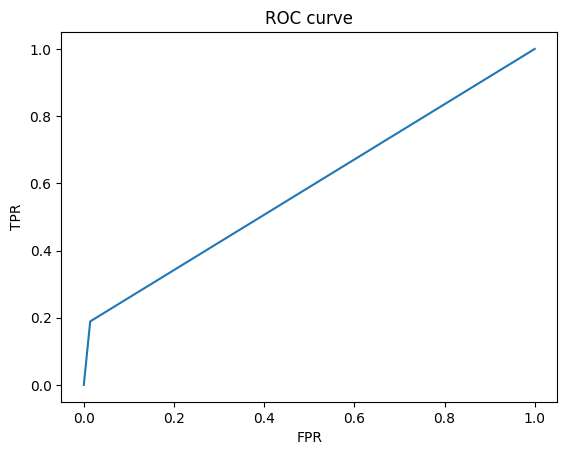

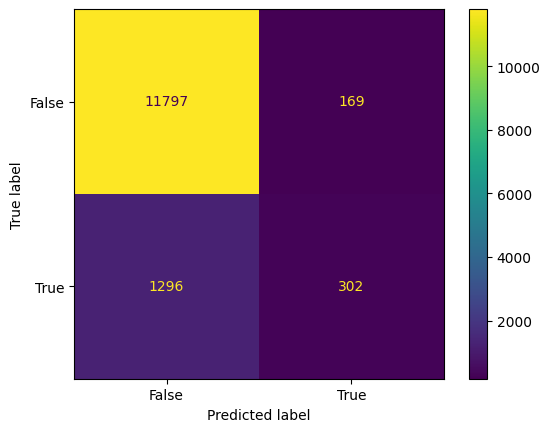

In [94]:
SVM(X,y,'linear')

<h4> SVM with polynomial kernel </h4>

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.67      0.22      0.33      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.60      0.64     13564
weighted avg       0.88      0.90      0.87     13564

Classification Report:
ROC_AUC_SCORE is 0.6042022066275808


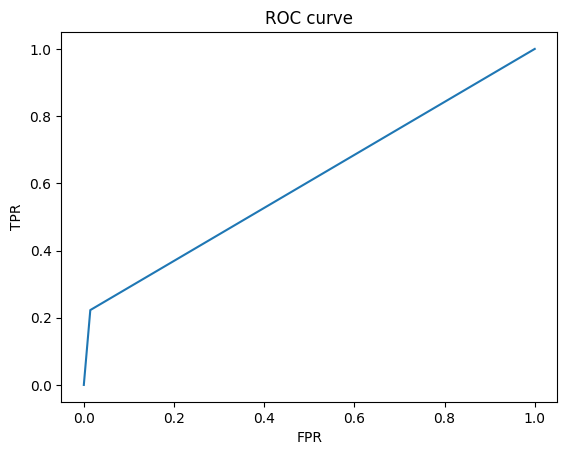

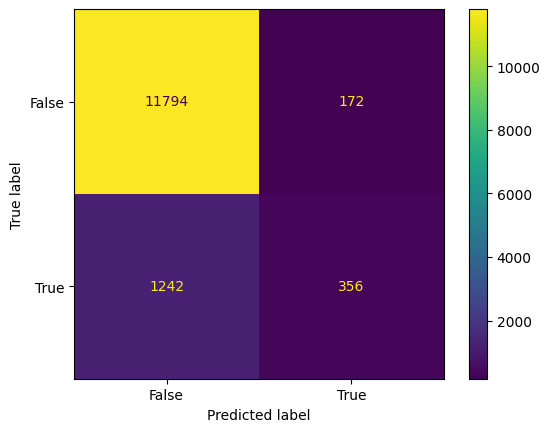

In [95]:
SVM(X,y,'poly')

<h4> SVM with RBF kernel </h4>

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.66      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Classification Report:
ROC_AUC_SCORE is 0.5862226558896431


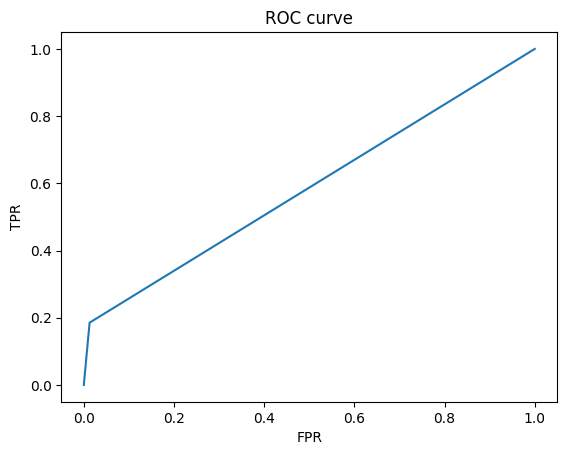

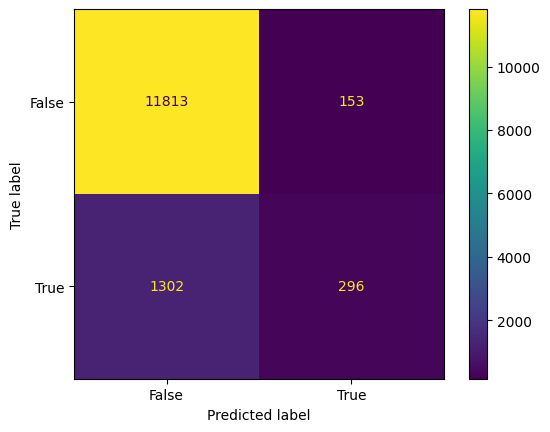

In [96]:
SVM(X,y,'rbf')

<h4> SVM with Sigmoid kernel </h4>

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11966
           1       0.20      0.20      0.20      1598

    accuracy                           0.81     13564
   macro avg       0.55      0.55      0.55     13564
weighted avg       0.81      0.81      0.81     13564

Classification Report:
ROC_AUC_SCORE is 0.5481629531482296


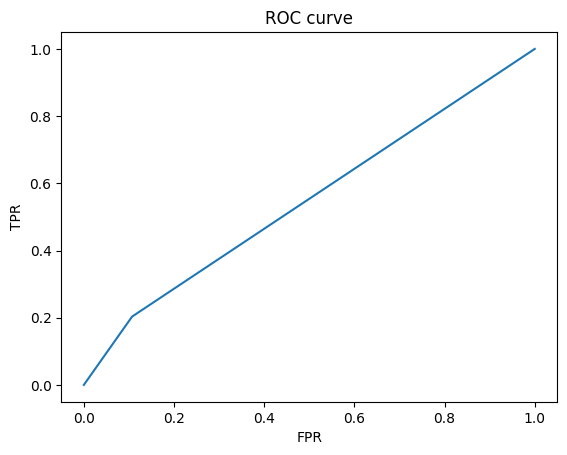

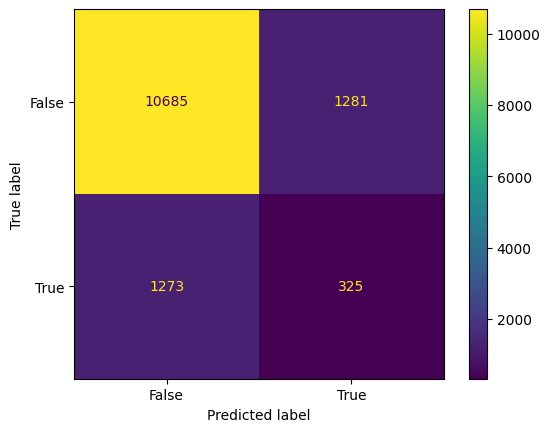

In [97]:
SVM(X,y,'sigmoid')

<h1> SVM : with One-Hot Encoded Data </h1>

In [98]:
X2 = df2.drop('y', axis=1)
y2 = df2['y']

<h4> SVM with linear kernel </h4>

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11966
         1.0       0.65      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564

Classification Report:
ROC_AUC_SCORE is 0.5867016935970231


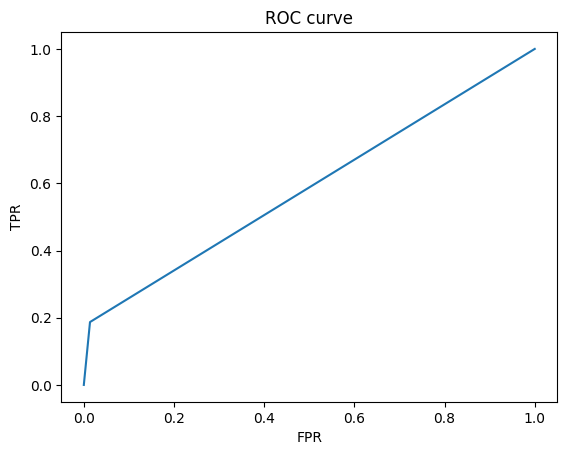

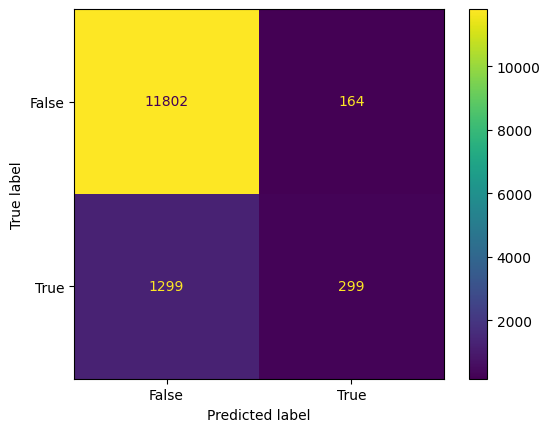

In [99]:
SVM(X2,y2,'linear')

<h4> SVM with Polynomial kernel </h4>

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11966
         1.0       0.67      0.26      0.37      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564

Classification Report:
ROC_AUC_SCORE is 0.6208252334472075


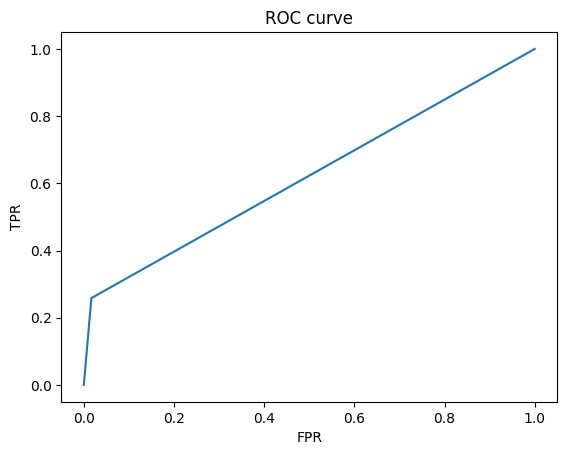

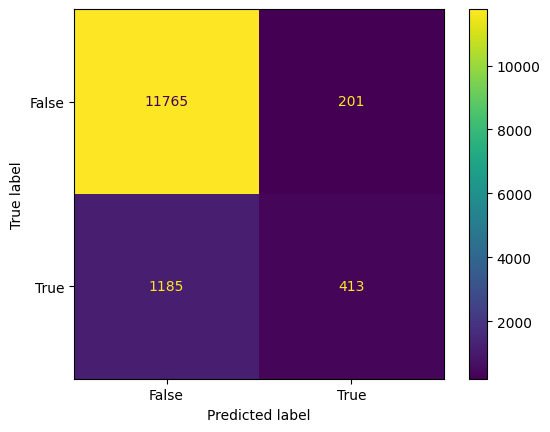

In [100]:
SVM(X2,y2,'poly')

<h4> SVM with RBF kernel </h4>

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11966
         1.0       0.67      0.19      0.30      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Classification Report:
ROC_AUC_SCORE is 0.590206670254917


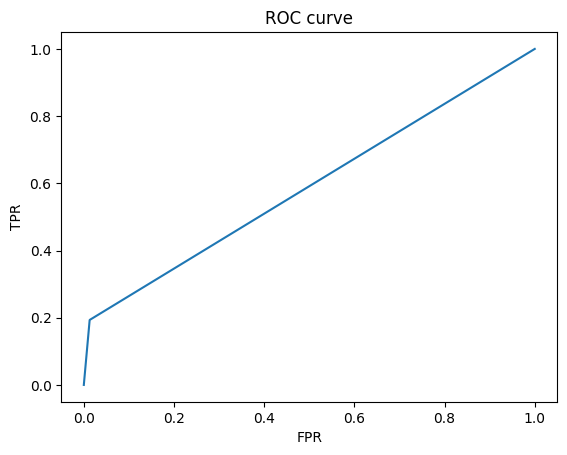

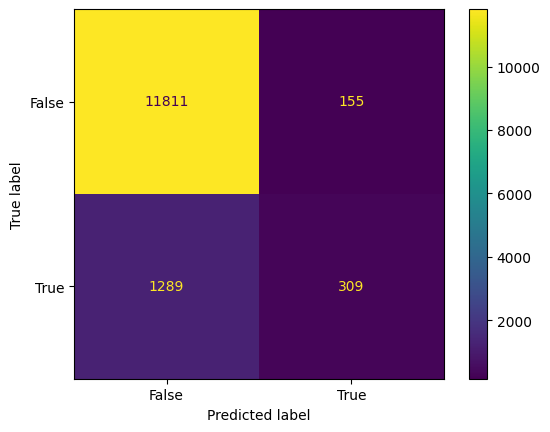

In [101]:
SVM(X2,y2,'rbf')

<h4> SVM with Sigmoid kernel </h4>

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     11966
         1.0       0.22      0.22      0.22      1598

    accuracy                           0.82     13564
   macro avg       0.56      0.56      0.56     13564
weighted avg       0.82      0.82      0.82     13564

Classification Report:
ROC_AUC_SCORE is 0.5598886561569837


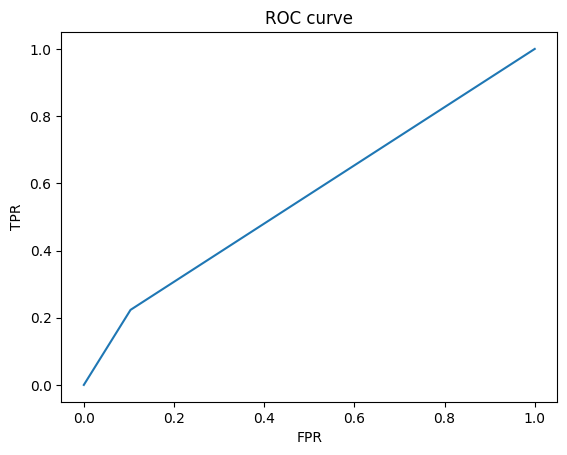

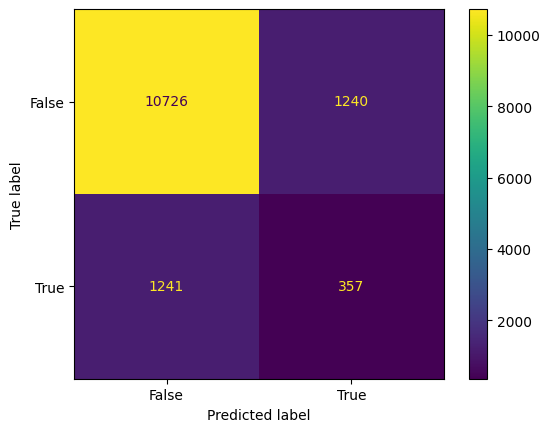

In [102]:
SVM(X2,y2,'sigmoid')

<h1> Result </h1>

<h3> Results of "Target Encoded Dataset" </h3>

<table style="width:100%; font-size:16px">
  <thead>
    <tr>
      <th>Kernel Type</th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear</td>
      <td>0.89</td>
      <td>0.64</td>
      <td>0.19</td>
    </tr>
    <tr>
      <td>Polynomial</td>
      <td>0.90</td>
      <td>0.67</td>
      <td>0.22</td>
    </tr>
    <tr>
      <td>RBF</td>
      <td>0.89</td>
      <td>0.66</td>
      <td>0.19</td>
    </tr>
    <tr>
      <td>Sigmoid</td>
      <td>0.81</td>
      <td>0.20</td>
      <td>0.20</td>
    </tr>
  </tbody>
</table>


<h3> Results of "One-Hot Encoded Dataset" </h3>

<table style="width:100%; font-size:16px">
  <thead>
    <tr>
      <th>Kernel Type</th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear</td>
      <td>0.89</td>
      <td>0.65</td>
      <td>0.19</td>
    </tr>
    <tr style="background-color:white; color:red">
      <td>Polynomial</td>
      <td>0.90</td>
      <td>0.67</td>
      <td>0.26</td>
    </tr>
    <tr>
      <td>RBF</td>
      <td>0.89</td>
      <td>0.67</td>
      <td>0.19</td>
    </tr>
    <tr>
      <td>Sigmoid</td>
      <td>0.82</td>
      <td>0.22</td>
      <td>0.22</td>
    </tr>
  </tbody>
</table>

<h2 style="color:green"> The Red Row indicates the best performance amongst all </h2>